In [223]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from numpy import random

In [224]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 25,
                color = 'green',
                edgecolor = 'k',
                marker = 's')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 25,
                color = 'red',
                edgecolor = 'k',
                marker = '^')
    plt.xlabel('a')
    plt.ylabel('b')
    plt.legend(['happy','sad'])
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=-2, ending=2):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

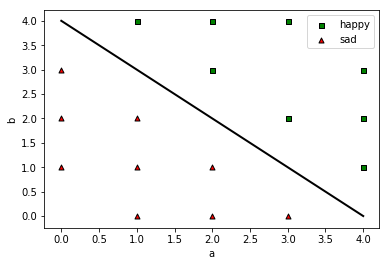

In [225]:
import pandas as pd
features = pd.DataFrame([[4,2],[2,0],[3,0],[0,1],[2,1],[0,2],[1,2],[2,3],[1,1],[4,1],[3,2],[4,3],[1,4],[2,4],[3,4],[1,0],[0,3]])
labels = pd.Series([1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0])
plot_points(features, labels)
draw_line(1,1,-4, starting=0, ending=4)

In [226]:
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))
def predict(features, weights):
    return sigmoid(np.dot(features, weights))
def log_loss(features, labels, a, b, c):
    predictions = (a*features[0] + b*features[1] - c).apply(sigmoid)
    error = 0
    for i in range(len(predictions)):
        y_hat, y = predictions.loc[i], labels.loc[i]
        error += - y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
        #print y_hat, y, error
    return error

In [287]:
random.seed(0)

def lr_trick(a, b, c, x1, x2, learning_rate, label):
    prediction = sigmoid(a*x1 + b*x2 + c)
    #print "========"
    #print "Point:",'(',x1,'x',x2,')'
    #print "Label:",label
    #print "Prediction:",prediction
    #print "Weights:",a,',',b,',',c

    a += learning_rate*(label - prediction)*x1
    b += learning_rate*(label - prediction)*x2
    c -= learning_rate*(label - prediction)
    new_prediction = sigmoid(a*x1 + b*x2 - c)
    
    #print "New weights:",a,',',b,',',c
    #new_prediction = sigmoid(a*x1 + b*x2 + c)
    #print "New prediction:", new_prediction
    #print "Got better?", np.abs(label-prediction) > np.abs(label-new_prediction)
    return a, b, c

def lr(features, labels, learning_rate=0.01, epochs = 1000, l1_rate=0, l2_rate=0, draw=True):

    features = features - features.mean()
    #features[1] = -features[1]
    left = min(features[0])
    right = max(features[1])


    a = 0.1#random.random(1)-0.5    #B
    b = 0.1#random.random(1)-0.5
    c = 0.1#random.random(1)-0.5
    plot_points(features, labels)
    if draw or True:
        draw_line(a, b, c, linewidth = 1.0, linestyle='dotted', color='black', starting=left, ending=right)    #C
    errors = []
    
    for i in range(epochs):     #D
        if i<50 or i%(epochs/100.0) == 0:
            if draw:
                draw_line(a, b, c, linewidth = 0.1, linestyle='dotted', color='grey', starting=left, ending=right)
        errors.append(log_loss(features, labels, a, b, c))
        i = random.randint(len(features))     #E
        x1, x2 = features.loc[i]
        label = labels[i]
        a,b,c = lr_trick(a, b, c, x1, x2, learning_rate, label)
        
        # L1 Regularization step
        a -= l1_rate
        b -= l1_rate
        
        # L2 Regularization step
        a = (1-l2_rate)*a
        b = (1-l2_rate)*b

    print left, right
    draw_line(a, b, c, linewidth=0.5, color='black', starting=left, ending=right)
    print 'a: ' + str(a)     #G
    print 'b: ' + str(b)
    print 'c:'  + str(c)
    plt.show()
    plt.scatter(range(len(errors)), errors)
    plt.show()
    #return a, b, c     #I

-1.94117647059 2.05882352941
a: 0.06509407308387559
b: 0.3656279030630987
c:1.1425571639946905


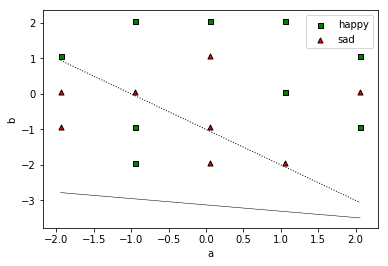

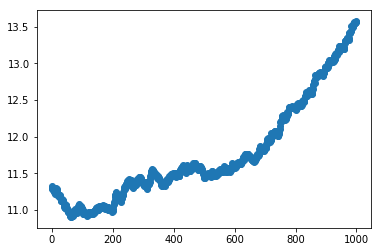

In [282]:
features = pd.DataFrame([[4,2],[2,0],[3,0],[0,1],[2,1],[0,2],[1,2],[2,3],[1,1],[4,1],[3,2],[4,3],[1,4],[2,4],[3,4],[1,0],[0,3]])
labels = pd.Series([1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0])

nfeatures = pd.DataFrame([[4,2],[2,0],[3,0],[0,1],[2,1],[0,2],[1,2],[2,3],[1,1],[4,1],[3,2],[4,3],[1,4],[2,4],[3,4],[1,0],[0,3]])
nlabels = pd.Series([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1])

#plot_points(features, labels)
#draw_line(1,1,-4, starting=0, ending=4)

lr(nfeatures, nlabels, epochs = 1000, draw=False, learning_rate=0.01, l2_rate=0.001, l1_rate=0.001)

-1.5 1.5
a: 1.5078882690083582
b: -1.3701956241183573
c:0.10215698182167829


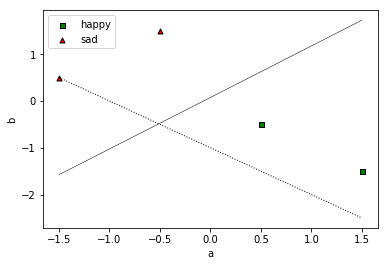

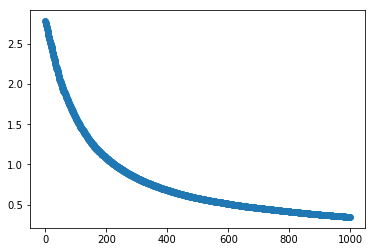

In [290]:
small_features = pd.DataFrame([[0,1],[1,0],[2,1],[1,2]])
small_labels = pd.Series([0,0,1,1])

small_features = pd.DataFrame([[0,1],[1,0],[2,0],[0,2],[1,1],[2,1],[1,2],[2,2],[1,3],[3,1]])
small_labels = pd.Series([0,0,0,0,0,1,1,1,1,1])

small_features = pd.DataFrame([[3,0],[0,2],[2,1],[1,3]])
small_labels = pd.Series([1,0,1,0])

#plot_points(small_features, small_labels)
#draw_line(1,1,-4, starting=0, ending=4)

lr(small_features, small_labels, epochs = 1000, draw=False)